## Ridge Regression

Ridge regression is a regularized version of linear regression. In addition to optimizing Ordinary Least Squares (OLS), a L2 penalty term is added and mediated by hyperparameter alpha. In effect, the ML algorithm reduces the overall magnitudes of the coefficients. However, it does not promote sparsity, unlike lasso regression.

The model minimizes the sum of squared residuals and the sum of squared coefficients.

`cost = sum((y-yhat)^2) + alpha * sum(coef^2)`

In [89]:
import numpy as np
import matplotlib.pyplot as plt

(100, 2)
(100, 1)


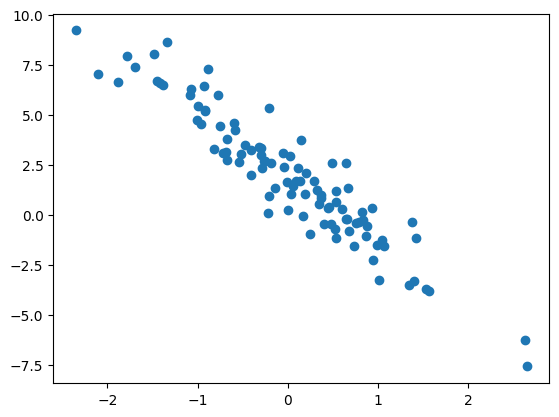

In [90]:
n = 100
x1 = np.random.randn(n, 1)
X = np.concatenate([x1, np.ones_like(x1)], axis=1)

noise_strength = 1
noise = np.random.randn(X.shape[0])

w = np.array([-3, 2])

y = X[:, 0]*w[0] + w[1] + noise_strength*noise
y = np.reshape(y, (-1, 1))

plt.scatter(X[:, 0], y)

print(X.shape)
print(y.shape)



In [91]:
class Ridge:

    def __init__(self, lr, alpha, epochs):
        
        self.lr = lr
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
    
    def fit(self, X, y):

        self.w = np.random.randn(X.shape[1], 1)

        for epoch in range(self.epochs):

            gradient = -(2/X.shape[0]) * X.T @ (y-X@self.w) + 2*self.alpha*(self.w)

            self.w -= self.lr*gradient
    
    def predict(self, X):

        return X @ self.w


In [92]:
ridge = Ridge(0.1, 1, 10)
ridge.fit(X, y)
ridge.w

array([[-1.46658929],
       [ 0.97020303]])

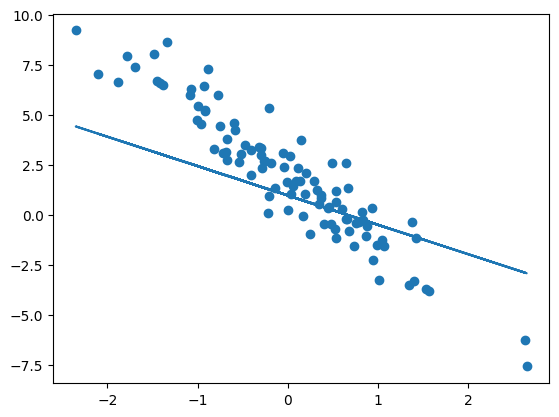

In [93]:
plt.scatter(X[:, 0], y)
plt.plot(x1, ridge.predict(X))

True param 0: -3
True param 1: 2
Observation: 
 Alpha is a regularization hyperparameter; increasing it will make shrink coeficients, but this will affect fit.


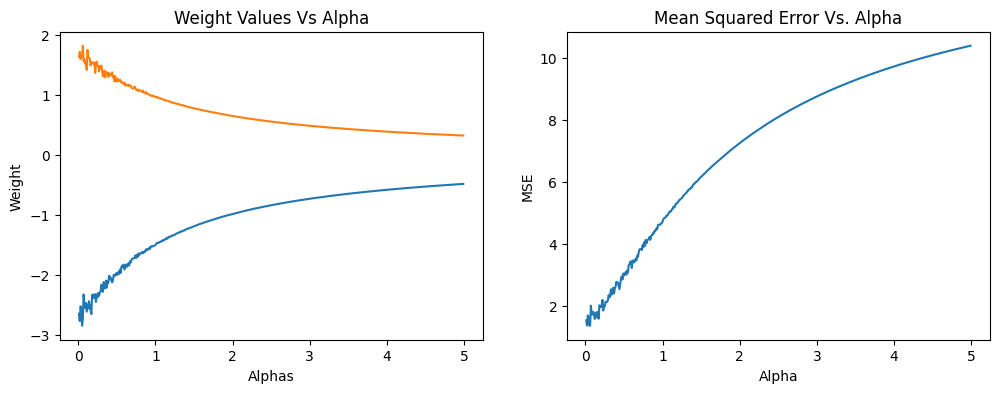

In [95]:
params_vals = []
mses = []

lr, epochs = 0.1, 10

alphas = np.arange(0.01, 5, 0.01)

for alpha in alphas:

    ridge = Ridge(lr, alpha, epochs)
    ridge.fit(X, y)
    params_vals.append(ridge.w)

    mse = (1/X.shape[0]) * np.sum((y-ridge.predict(X))**2, axis=0)
    mses.append(mse[0])

params_vals = np.reshape(params_vals, (-1, X.shape[1]))

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

for i in range(X.shape[1]):

    ax[0].plot(alphas, params_vals[:, i])

ax[0].set_xlabel("Alphas")
ax[0].set_ylabel("Weight")
ax[0].set_title("Weight Values Vs Alpha")

ax[1].plot(alphas, mses)
ax[1].set_title("Mean Squared Error Vs. Alpha")
ax[1].set_xlabel("Alpha")
ax[1].set_ylabel("MSE")

for j in range(w.size):

    print(f"True param {j}: {w[j]}")

print("Observation: \n Alpha is a regularization hyperparameter; increasing it will make shrink coeficients, but this will affect fit.")

